<a href="https://colab.research.google.com/github/JulioEsquivelR/MachineLearning/blob/main/Taller2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, HTML
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#  Linear Regression


## Exercise 

This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms. However, these comparisons were primarily done outside of Delve and are thus somewhat suspect. The dataset is small in size with only 506 cases.

Utilizar [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)





### Understanding Data

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per us\$10,000
- PTRATIO - pupil-teacher ratio by town
- B  $1000(Bk - 0.63)^2$ where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in us\$1000's

Descriptive analytics

- What questions would you ask to understand the data?
- What visualization tools to use?

In [ ]:

boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)

print(boston.data.shape) #get (numer of rows, number of columns or 'features')
print(boston.DESCR) #get a description of the dataset
boston_df.describe()

(506, 13)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - P

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


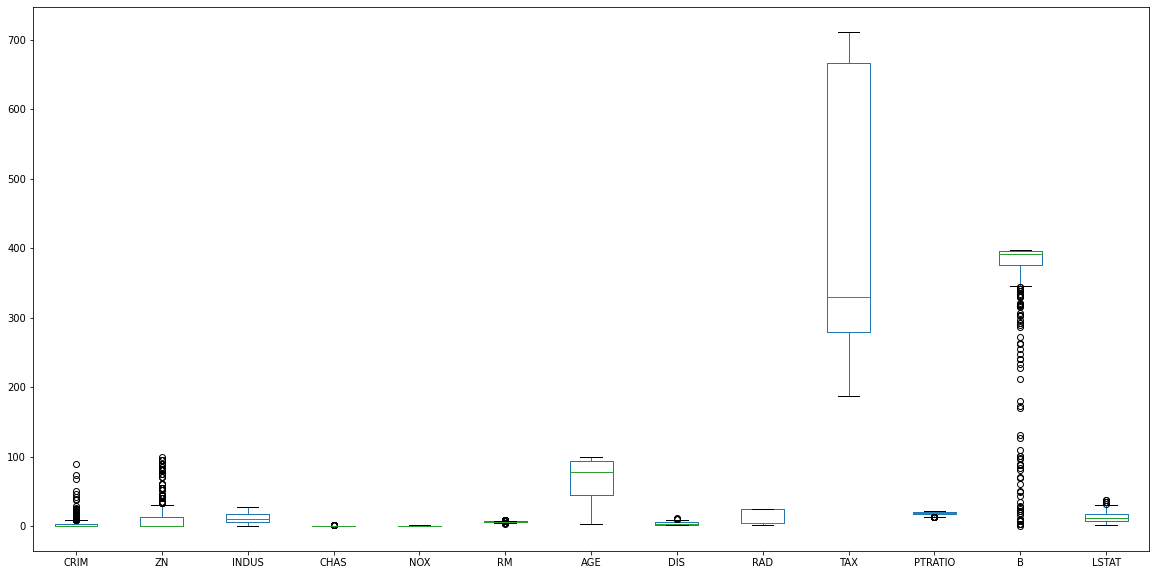

In [ ]:
boston_df.plot.box(figsize=(20,10))

### Preparing the data



In [ ]:
# add another column that contains the house prices which in scikit learn datasets are considered as target
boston_df['Price']=boston.target
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


#### Split training and text data

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. Note that the word “experiment” is not intended to denote academic use only, because even in commercial settings machine learning usually starts out experimentally.

In [ ]:

# split training and text data
X=boston_df.drop('Price',axis=1)
y=boston_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1212)

### Modeling

#### Train the model

Train the models consist in  make  the optimization to obtain the long memory paramters of the model.

In [ ]:
# Create linear regressor object (in an array to train all)

#TODO: add Lasso Models:$\alpha = 100$',r'Lasso, $\alpha = 0.001$',r'Lasso, $\alpha = 0.7$'
names=['Linear Regression',r'Ridge; $\alpha = 0.01$',r'Ridge; $\alpha = 100$',r'Lasso, $\alpha = 0.001$',r'Lasso, $\alpha = 0.7$']
models = [LinearRegression(),Ridge(alpha=0.01),Ridge(alpha=100), Lasso(alpha=0.001), Lasso(alpha=0.7)]


for regr,name in zip(models,names):
  regr.fit(X_train, y_train)
  # The coefficients
  print('model ',name)
  print('Coefficients: ', regr.coef_)
  print('Intercept: ', regr.intercept_)



model  Linear Regression
Coefficients:  [-9.71690750e-02  4.40216888e-02  5.99318110e-02  2.81326767e+00
 -1.73330120e+01  3.51862631e+00  2.71366690e-03 -1.42521321e+00
  3.20482276e-01 -1.44230960e-02 -9.73203538e-01  6.69087758e-03
 -5.80727844e-01]
Intercept:  39.97772554872658
model  Ridge; $\alpha = 0.01$
Coefficients:  [-9.70964229e-02  4.40379114e-02  5.92963044e-02  2.81097291e+00
 -1.71879712e+01  3.52060509e+00  2.57075374e-03 -1.42309630e+00
  3.20223898e-01 -1.44370238e-02 -9.71479573e-01  6.69450657e-03
 -5.80908916e-01]
Intercept:  39.87013288728727
model  Ridge; $\alpha = 100$
Coefficients:  [-0.08687147  0.05223901 -0.00694598  0.55763387 -0.20509164  2.02124599
  0.00556098 -1.0617979   0.34326505 -0.01855334 -0.82678013  0.00636268
 -0.73149656]
Intercept:  39.805626811206196
model  Lasso, $\alpha = 0.001$
Coefficients:  [-9.69885059e-02  4.40574115e-02  5.85378810e-02  2.79544109e+00
 -1.70050782e+01  3.52108037e+00  2.43471934e-03 -1.42002823e+00
  3.19921969e-01 -

Understanding the difference

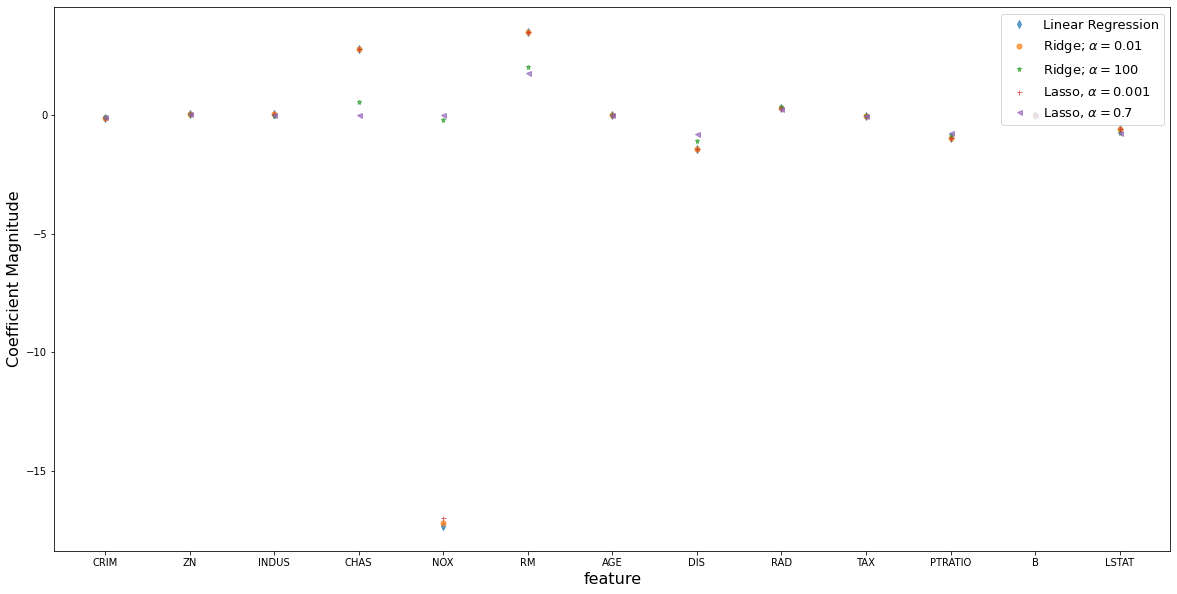

In [ ]:

markers=['d','o','*','+','<','>']
plt.figure(figsize=(20,10))
for i in range(0,len(names)):
  plt.plot(X.columns,models[i].coef_,alpha=0.7,linestyle='none',marker=markers[i],markersize=5,label=names[i])
plt.xlabel('feature',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=1)
plt.show()


## Which is the best model?

When evaluating different settings (“hyperparameters”) for estimators or differents models, there are the risk of overfitting on the test set because the selection of the model can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). 

Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include gamma for Ridge, alpha for Lasso, etc.  It is possible and recommended to search the hyper-parameter space for the best cross validation score.

Any parameter provided when constructing an estimator may be optimized in this manner. Specifically, to find the names and current values for all parameters for a given estimator, use:

estimator.get_params()

Two generic approaches to sampling search candidates are provided in scikit-learn: for given values, [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) exhaustively considers all parameter combinations, while [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV) can sample a given number of candidates from a parameter space with a specified distribution.

[More information](https://scikit-learn.org/stable/modules/grid_search.html)

In [ ]:

from sklearn.model_selection import cross_val_score

#from https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
scoring =['explained_variance',
          'neg_mean_absolute_error',
          'neg_mean_squared_error',
          'neg_mean_squared_log_error',
          'neg_median_absolute_error',
          'r2']

#TODO: try differents score, whyis the best?
#score?
score = 'r2'
for reg,name in zip(models,names):
    scores = cross_val_score(reg, X_train, y_train.ravel(), scoring=score,
                            cv=5)
    print('--------------------------------------')
    print('model {0:20} | score {1:20}'.format(name,score))
    print('mean {0:22.2f}| std   {1:<22.2f}'.format(scores.mean(),scores.std()))
    print("Accuracy(95.7%): {0:23.2f} (+/- {1:.2f})" .format(scores.mean(), scores.std() * 2))


--------------------------------------
model Linear Regression    | score r2                  
mean                   0.71| std   0.04                  
Accuracy(95.7%):                    0.71 (+/- 0.08)
--------------------------------------
model Ridge; $\alpha = 0.01$ | score r2                  
mean                   0.71| std   0.04                  
Accuracy(95.7%):                    0.71 (+/- 0.08)
--------------------------------------
model Ridge; $\alpha = 100$ | score r2                  
mean                   0.69| std   0.04                  
Accuracy(95.7%):                    0.69 (+/- 0.08)
--------------------------------------
model Lasso, $\alpha = 0.001$ | score r2                  
mean                   0.71| std   0.04                  
Accuracy(95.7%):                    0.71 (+/- 0.08)
--------------------------------------
model Lasso, $\alpha = 0.7$ | score r2                  
mean                   0.68| std   0.04                  
Accuracy(95.7%):    

explained_variance mean 0.71| std   0.04

neg_mean_absolute_error mean -3.43| std   0.41

neg_mean_squared_error mean -23.83| std   7.12 

neg_median_absolute_error mean -2.59| std   0.47    

r2             mean  0.71| std   0.04                  



## Exercise (try other models)

Try to use [Elastic-NET](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html), [RANSAC](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html) and [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)


In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RANSACRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.datasets import make_regression

names_others=['ElasticNet; $\alpha=0.001',r'MLPRegressor; $\alpha = 0.001$',r'RANSAC']
other_models = [ElasticNet(alpha=0.001),MLPRegressor(alpha=0.001,max_iter=10000000,activation='relu'),RANSACRegressor(random_state=0)]

regrElastic = ElasticNet(alpha=0.001)
regr.fit(X_train, y_train)
  # The coefficients
print('model ','ElasticNet')
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

regr_mlp = MLPRegressor(alpha=0.001,max_iter=100000000,activation='relu')
regr_mlp.fit(X_train, y_train)
  # The coefficients
print('model ','MLPRegressor')
print('Coefficients: ', regr_mlp.coefs_)
print('Intercept: ', regr_mlp.intercepts_)

regr_ran = RANSACRegressor(random_state=0)
regr_ran.fit(X_train, y_train)
  # The coefficients
#print('model ','RANSACRegressor')
#print('Coefficients: ', regr_ran.coefs_)
#print('Intercept: ', regr_ran.intercepts_)
#

model  ElasticNet
Coefficients:  [-0.06358425  0.04626833  0.          0.         -0.          1.76703816
  0.0136127  -0.79350229  0.2743243  -0.01582701 -0.73572331  0.00622391
 -0.74797302]
Intercept:  37.796027341004454
model  MLPRegressor
Coefficients:  [array([[-3.12507507e-02,  1.69969448e-01,  1.84709313e-01, ...,
         1.63100542e-03,  5.80365010e-01,  5.22789310e-02],
       [-5.45732720e-02,  2.10842928e-01, -1.15487399e-01, ...,
         1.09442472e-08,  7.41536972e-02, -1.44395408e-01],
       [-2.05680340e-01, -1.65653325e-01, -2.22001268e-01, ...,
        -3.09697755e-02, -5.04101777e-01, -4.06177141e-02],
       ...,
       [-8.83195467e-02,  2.07051339e-01, -1.65863859e-01, ...,
        -5.13057717e-03, -3.25911538e-01,  5.07365617e-03],
       [-6.16251568e-02,  1.24506816e-01,  8.41477191e-02, ...,
        -1.58991440e-01,  1.57655622e-01,  2.22355912e-01],
       [ 4.98689148e-02,  2.08333004e-01, -1.14995035e-01, ...,
         3.15068160e-02, -3.61877651e-01, -1

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=0, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [ ]:

for reg,name in zip(models,names_others):
    scores = cross_val_score(reg, X_train, y_train.ravel(), scoring=score,
                            cv=5)
    print('--------------------------------------')
    print('model {0:20} | score {1:20}'.format(name,score))
    print('mean {0:22.2f}| std   {1:<22.2f}'.format(scores.mean(),scores.std()))


--------------------------------------
model ElasticNet; $lpha=0.001 | score r2                  
mean                   0.71| std   0.04                  
--------------------------------------
model MLPRegressor; $\alpha = 0.001$ | score r2                  
mean                   0.71| std   0.04                  
--------------------------------------
model RANSAC               | score r2                  
mean                   0.69| std   0.04                  


### Test the Model

Can we generalize our model to work good with other data?

regressor score                |      0.81
Mean squared error             |     16.10
mean_squared_error             |     16.10
mean_absolute_error            |      2.70
median_absolute_error          |      1.86
explained_variance_score       |      0.81
r ^ 2 score                    |      0.81


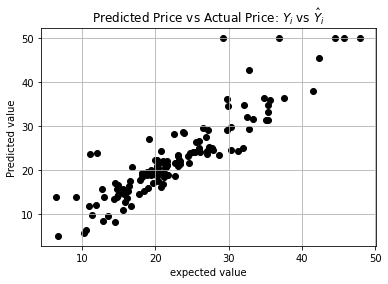

In [ ]:
from sklearn.metrics import accuracy_score,median_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score,mean_squared_log_error,explained_variance_score


def test_model(X,y_test,regr):
  #prediction
  y_pred=regr.predict(X)
  ##graficas
  plt.scatter(y_pred, y_test,  color='black')
  plt.xlabel('expected value')
  plt.ylabel('Predicted value')
  plt.title("Predicted Price vs Actual Price: $Y_i$ vs $\hat{Y}_i$")
  plt.grid(True)
  # https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
  print('{0:30} | {1:9.2f}'.format('regressor score', regr.score(X,y_test)))
  print('{0:30} | {1:9.2f}'.format('Mean squared error', np.mean((y_pred - y_test) ** 2)))
  print('{0:30} | {1:9.2f}'.format('mean_squared_error', mean_squared_error(y_test,y_pred)))
  print('{0:30} | {1:9.2f}'.format('mean_absolute_error', mean_absolute_error(y_test,y_pred)))
  print('{0:30} | {1:9.2f}'.format('median_absolute_error', median_absolute_error(y_test,y_pred)))
  print('{0:30} | {1:9.2f}'.format('explained_variance_score', explained_variance_score(y_test,y_pred)))
  print('{0:30} | {1:9.2f}'.format('r ^ 2 score', r2_score(y_test,y_pred)))

#TODO:  
best_model = regr_mlp.fit(X_train, y_train)
test_model(X_test,y_test,best_model)

### Implementation


How it is going to work inside the process and organization?

## Ejercicio 

A partir de la comprensión inicial de los datos de Fasecolda (ejercicio 1) o otro dataset de su elección

- ¿cuales serian las mejores variables de entrada para hacer la regresión y porque?



- Que ejercicio de regresión realizaria ?

- Seria util realizar una regresión de Lasso? por que?

- ¿que técnicas de visualización o muestra de resultados aplicaría?










In [ ]:
## Cargamos el dataset de Fasecolda
import pandas as pd
from google.colab import files
files.upload()

data = pd.read_csv('Life Expectancy Data.csv')
expectativa_df=pd.DataFrame(data)

print(data.shape) #get (numer of rows, number of columns or 'features')
#Consultar las columnas
expectativa_df.dtypes

Saving Life Expectancy Data.csv to Life Expectancy Data (2).csv
(2938, 22)


Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

# **Descripcion de cada columna**

**Country**: country

**Year**: Year

**Status**: Developed or Developing status of the country

**Life expectancy**: Life Expectancy in age

**Adult Mortality**: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

**infant deaths**: Number of Infant Deaths per 1000 population

**Alcohol**: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

**percentage expenditure**: Expenditure on health as a percentage of Gross Domestic Product per capita(%)

**Hepatitis B**: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

**Measles**: Measles - number of reported cases per 1000 population

**BMI**: Average Body Mass Index of entire population

**under-five deaths**: Number of under-five deaths per 1000 population

**Polio**: Polio (Pol3) immunization coverage among 1-year-olds (%)

**Total expenditure**: General government expenditure on health as a percentage of total government expenditure (%)

**Diphtheria**: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

**HIV/AIDS**: Deaths per 1 000 live births HIV/AIDS (0-4 years)

**GDP**: Gross Domestic Product per capita (in USD)

**Population**: Population of the country

**thinness 1-19 years**: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

**thinness 5-9 years**: Prevalence of thinness among children for Age 5 to 9(%)

**Income composition of resources**: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

**Schooling**: Number of years of Schooling(years)

*Descripciones obtenidas de* https://www.kaggle.com/kumarajarshi/life-expectancy-who

In [ ]:
#Descripción estadisticas de los datos
expectativa_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


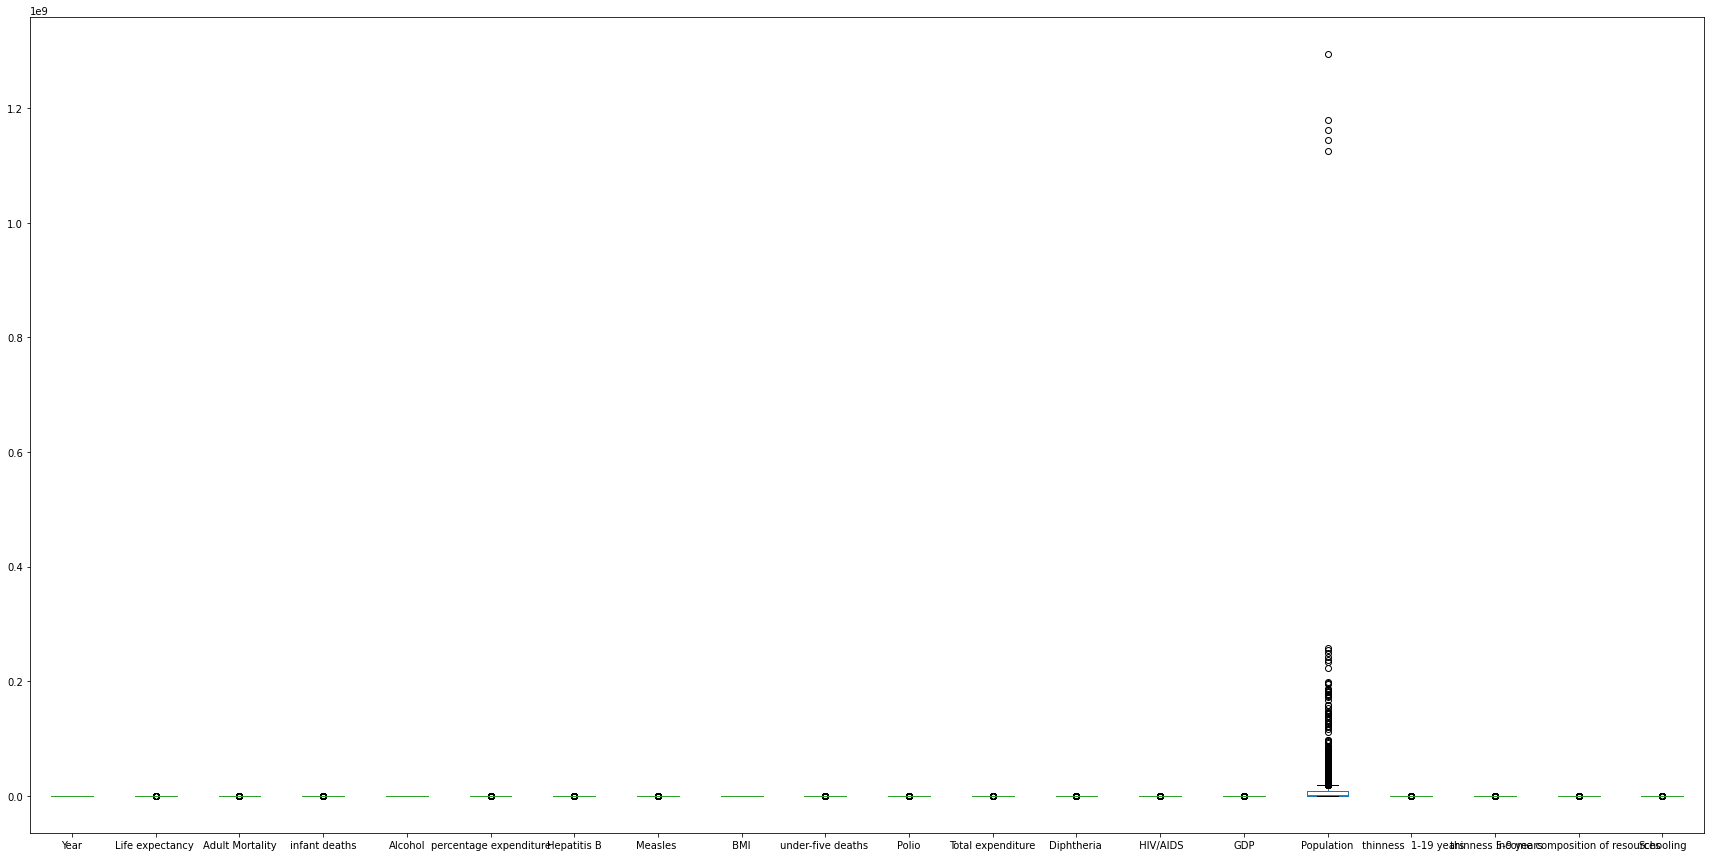

In [ ]:
expectativa_df.plot.box(figsize=(30,15))

In [ ]:
#Ver valores vacios
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

1. ¿cuales serian las mejores variables de entrada para hacer la regresión y porque?
                          
Status                               
Life expectancy                     
Adult Mortality                     
infant deaths                        
percentage expenditure               
Measles                              
BMI                                
under-five deaths                    
Polio                               
Diphtheria                          
HIV/AIDS                            
thinness  1-19 years               
thinness 5-9 years                 
Schooling

Porque presentan pocos o ningun dato faltante y en su mayoría son de tipo cuantitativo.
*Status* seria un variable categorica que se puede cambiar por un valor binario.

2. ¿Que otras fuentes de información utilizaría para para mejorar la predicción realizada?

Complementariamos usando datos sobre 

*   Consumo de azucar: https://www.statista.com/statistics/496002/sugar-consumption-worldwide/
*   Consumo de alcohol dado que el dataset usado tenia datos faltantes: 
https://ourworldindata.org/alcohol-consumption
*   Estadisticas de muertes y consumo de cigarrillo: https://ourworldindata.org/smoking

3. Que transformaciones requiere realizar sobre los datos?

Status seria un variable categorica que se debe cambiar por un valor binario.
Se deben eliminar las columnas que no se usaran y eliminar los registros sin datos


In [ ]:
#usar funcion de pandas para variable categorica https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
categorical=pd.get_dummies(data['Status'])

data=pd.concat([data,categorical],axis=1)

#Eliminando las columnas que no se van a usar y la que se reemplazo Status
data=data.drop(['Country','Year','Income composition of resources','Alcohol','Hepatitis B','Total expenditure','GDP', 'Population','Status'],axis=1)
data.head()

,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Schooling,Developed,Developing
0,65.0,263.0,62,71.279624,1154,19.1,83,6.0,65.0,0.1,17.2,17.3,10.1,0,1
1,59.9,271.0,64,73.523582,492,18.6,86,58.0,62.0,0.1,17.5,17.5,10.0,0,1
2,59.9,268.0,66,73.219243,430,18.1,89,62.0,64.0,0.1,17.7,17.7,9.9,0,1
3,59.5,272.0,69,78.184215,2787,17.6,93,67.0,67.0,0.1,17.9,18.0,9.8,0,1
4,59.2,275.0,71,7.097109,3013,17.2,97,68.0,68.0,0.1,18.2,18.2,9.5,0,1


In [ ]:

#numero de registros antes de borrar
print(data.shape) 
#Remover los registros, filas, que no tienen valores
data['Life expectancy '].fillna(0,inplace=True)
data=data[data['Life expectancy '] != 0]

data['Adult Mortality'].fillna(0,inplace=True)
data=data[data['Adult Mortality'] != 0]

data[' BMI '].fillna(0,inplace=True)
data=data[data[' BMI '] != 0]

data['Diphtheria '].fillna(0,inplace=True)
data=data[data['Diphtheria '] != 0]

data['Polio'].fillna(0,inplace=True)
data=data[data['Polio'] != 0]

data[' thinness  1-19 years'].fillna(0,inplace=True)
data=data[data[' thinness  1-19 years'] != 0]

data[' thinness 5-9 years'].fillna(0,inplace=True)
data=data[data[' thinness 5-9 years'] != 0]

data['Schooling'].fillna(0,inplace=True)
data=data[data['Schooling'] != 0]

#Ver cantidad de datos despues de limpiar
print(data.shape) 

(2938, 15)
(2718, 15)


In [ ]:
#actualizar dataframe
expectativa_df=pd.DataFrame(data)

## split training and test data
y=expectativa_df['Life expectancy ']
X=expectativa_df.drop('Life expectancy ',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1212)

In [ ]:
# Create linear regressor object (in an array to train all)

names_reg=['Linear Regression',r'Ridge; $\alpha = 0.01$',r'Ridge; $\alpha = 100$',r'Lasso, $\alpha = 0.001$']
models_reg = [LinearRegression(),Ridge(alpha=0.01),Ridge(alpha=100), Lasso(alpha=0.001,max_iter=1000000000)]


for regr,name in zip(models_reg,names_reg):
  regr.fit(X_train, y_train)
  # The coefficients
  print('model ',name)
  print('Coefficients: ', regr.coef_)
  print('Intercept: ', regr.intercept_)


model  Linear Regression
Coefficients:  [-1.70190298e-02  8.96761507e-02  2.92139652e-04 -1.54778555e-05
  3.08879290e-02 -6.62534549e-02  1.95596958e-02  2.53199634e-02
 -5.06306178e-01 -3.95212379e-02 -4.12720215e-03  1.35945416e+00
  4.95028061e-01 -4.95028061e-01]
Intercept:  52.10895145017756
model  Ridge; $\alpha = 0.01$
Coefficients:  [-1.70190437e-02  8.96761261e-02  2.92141386e-04 -1.54778861e-05
  3.08879622e-02 -6.62534324e-02  1.95597307e-02  2.53199856e-02
 -5.06305994e-01 -3.95215153e-02 -4.12743689e-03  1.35945375e+00
  4.95016038e-01 -4.95016038e-01]
Intercept:  52.10894536447108
model  Ridge; $\alpha = 100$
Coefficients:  [-1.71499909e-02  8.95337773e-02  3.06705614e-04 -1.57448252e-05
  3.12932553e-02 -6.61125799e-02  1.98853004e-02  2.55623551e-02
 -5.04511700e-01 -4.20238743e-02 -6.07282998e-03  1.35297593e+00
  4.00930669e-01 -4.00930669e-01]
Intercept:  52.08975666464808
model  Lasso, $\alpha = 0.001$
Coefficients:  [-1.70231812e-02  8.96380831e-02  2.92778495e-04

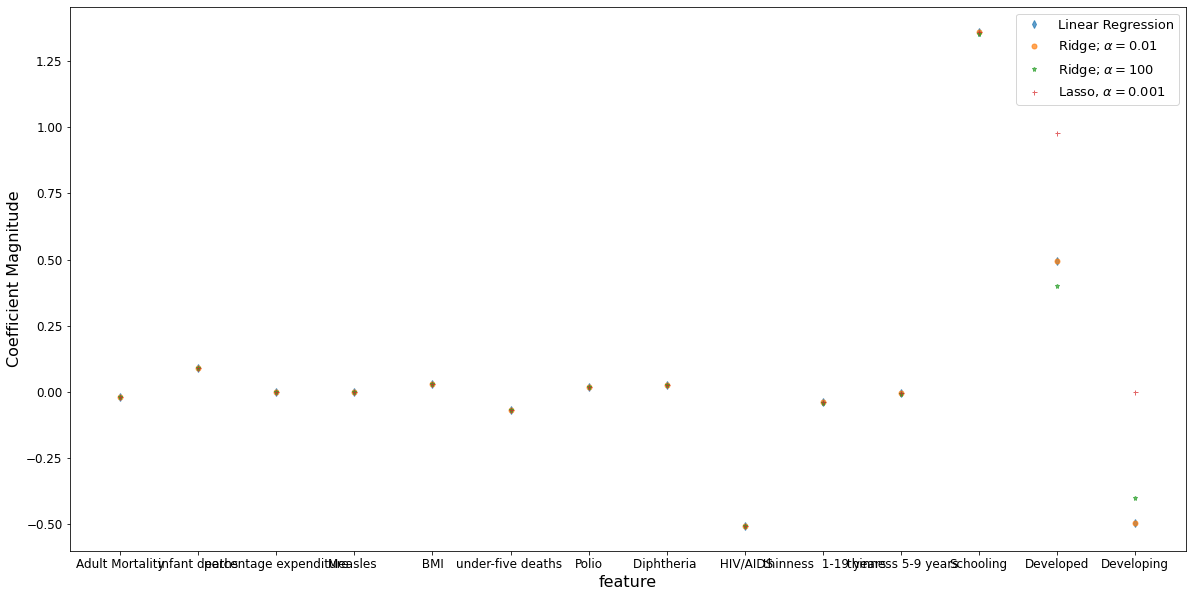

In [ ]:
markers=['d','o','*','+','<','>']
plt.figure(figsize=(20,10))
for i in range(0,len(names_reg)):
  plt.plot(X.columns,models_reg[i].coef_,alpha=0.7,linestyle='none',marker=markers[i],markersize=5,label=names[i])
plt.xlabel('feature',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=1)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

#from https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
scoring =['explained_variance',
          'neg_mean_absolute_error',
          'neg_mean_squared_error',
          'neg_mean_squared_log_error',
          'neg_median_absolute_error',
          'r2']
score = 'r2'
for reg,name in zip(models_reg,names_reg):
    scores = cross_val_score(reg, X_train, y_train.ravel(), scoring=score,
                            cv=5)
    print('--------------------------------------')
    print('model {0:20} | score {1:20}'.format(name,score))
    print('mean {0:22.2f}| std   {1:<22.2f}'.format(scores.mean(),scores.std()))
    print("Accuracy(95.7%): {0:23.2f} (+/- {1:.2f})" .format(scores.mean(), scores.std() * 2))

--------------------------------------
model Linear Regression    | score r2                  
mean                   0.83| std   0.01                  
Accuracy(95.7%):                    0.83 (+/- 0.02)
--------------------------------------
model Ridge; $\alpha = 0.01$ | score r2                  
mean                   0.83| std   0.01                  
Accuracy(95.7%):                    0.83 (+/- 0.02)
--------------------------------------
model Ridge; $\alpha = 100$ | score r2                  
mean                   0.83| std   0.01                  
Accuracy(95.7%):                    0.83 (+/- 0.02)
--------------------------------------
model Lasso, $\alpha = 0.001$ | score r2                  
mean                   0.83| std   0.01                  
Accuracy(95.7%):                    0.83 (+/- 0.02)


regressor score                |      0.83
Mean squared error             |     14.92
mean_squared_error             |     14.92
mean_absolute_error            |      3.01
median_absolute_error          |      2.46
explained_variance_score       |      0.83
r ^ 2 score                    |      0.83


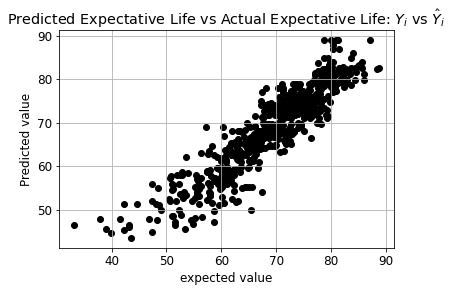

In [ ]:
def test_model_2(X,y_test,regr):
  #prediction
  y_pred=regr.predict(X)
  ##graficas
  plt.scatter(y_pred, y_test,  color='black')
  plt.xlabel('expected value')
  plt.ylabel('Predicted value')
  plt.title("Predicted Expectative Life vs Actual Expectative Life: $Y_i$ vs $\hat{Y}_i$")
  plt.grid(True)
  # https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
  print('{0:30} | {1:9.2f}'.format('regressor score', regr.score(X,y_test)))
  print('{0:30} | {1:9.2f}'.format('Mean squared error', np.mean((y_pred - y_test) ** 2)))
  print('{0:30} | {1:9.2f}'.format('mean_squared_error', mean_squared_error(y_test,y_pred)))
  print('{0:30} | {1:9.2f}'.format('mean_absolute_error', mean_absolute_error(y_test,y_pred)))
  print('{0:30} | {1:9.2f}'.format('median_absolute_error', median_absolute_error(y_test,y_pred)))
  print('{0:30} | {1:9.2f}'.format('explained_variance_score', explained_variance_score(y_test,y_pred)))
  print('{0:30} | {1:9.2f}'.format('r ^ 2 score', r2_score(y_test,y_pred)))


best_model = LinearRegression().fit(X_train, y_train)
test_model_2(X_test,y_test,best_model)

¿que técnicas de visualización o muestra de resultados aplicaría?

Utilizaríamos una técnica que nos ayude a sintetizar la información de manera gráfica de tal forma que el cliente pueda captar de manera sencilla lo que deseamos transmitir y en la que se puedan evidenciar patrones. Para esto podemos hacer uso de herramientas como Tableu, la cual es una herramienta de visualización interactiva, que nos permite generar Dashboard para la inteligencia de negocios.

## Presente sus conclusiones sobre regresiones


Las variables utilizadas para la construcción del modelo de regresión nos aportan suficiente información para ajustar el modelo. Ya que el porcentaje de variación de la variable de respuesta que explica su relación con las variables predictoras es del 83%. 

Dandonos así, buenas predicciones para la expectativa de vida.